## Do the number of hospital admissions differ significantly between weekdays and weekends?

EDA: Boxplots of average admissions during week and average admissions during weekends. The ADMISSIONS data would be segmented by date and a derived attribute indicating whether it was a weekday or weekend. Visualization: Seaborn.

In [43]:
# Imports for DFs & connecting to Postgres
import pandas as pd
import psycopg2

In [44]:
# Connect to Postgres & get all records for ADMISSIONS
try:
    con = psycopg2.connect("host='localhost' dbname='mimic' user='postgres' password='postgres'")
    cur = con.cursor()
    cur.execute ("""SELECT * FROM mimiciii.admissions;""")
    con.commit()
    print('OK')
except Exception as e:
    print(e)  

OK


In [45]:
# Store ADMISSIONS result in var
admissions_all = cur.fetchall()

In [46]:
# Convert ADMISSIONS result to DF
admissions_df = pd.DataFrame(admissions_all, columns = ['row_id','subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
 'admission_type', 'admission_location', 'discharge_location',
 'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
 'has_chartevents_data'])

In [47]:
# Create shortened DF of relevant cols
admission_short = admissions_df[['hadm_id', 'admittime']]

In [48]:
# admission_short['dayofweek'] = admission_short['admittime'].apply(lambda x: x.dayofweek)
admission_short['dayofweek'] = admission_short['admittime'].apply(lambda x: x.day_name())

C:\Users\bcrom\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
# # Create two subset DFs containing weekday admissions & weekend admissions
# adm_wkday = admission_short[(admission_short['dayofweek'] != 'Saturday') & (admission_short['dayofweek'] != 'Sunday')]
# adm_wkend = admission_short[(admission_short['dayofweek'] == 'Saturday') | (admission_short['dayofweek'] == 'Sunday')]

In [56]:
admission_short.head()

,hadm_id,admittime,dayofweek
0,165315,2196-04-09 12:26:00,Saturday
1,152223,2153-09-03 07:15:00,Monday
2,124321,2157-10-18 19:34:00,Tuesday
3,161859,2139-06-06 16:14:00,Saturday
4,129635,2160-11-02 02:06:00,Sunday


In [59]:
adm_by_days = admission_short.groupby(by='dayofweek').agg({'hadm_id':'count'})

In [65]:
adm_by_days.sort_values(by='hadm_id', inplace=True)

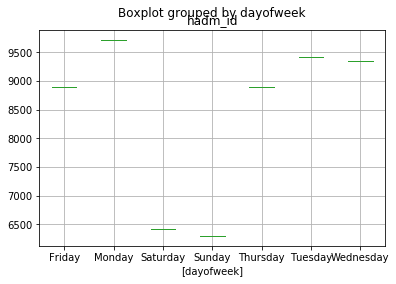

In [66]:
adm_by_days.boxplot(by='dayofweek')